In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import matplotlib.patches as patches

## 数据集读取与标签可视化

In [70]:
# 文件名
f_img = '.\\Plate_dataset\\AC\\train\\jpeg\\2.jpg'
f_xml = '.\\Plate_dataset\\AC\\train\\xml\\2.xml'

In [71]:
# 读取图像
img = cv2.imread(f_img)
# 读取xml
anno = ET.ElementTree(file=f_xml)
# 读取车牌字符label
label = anno.find('object').find('platetext').text

# bounding box
xmin = anno.find('object').find('bndbox').find('xmin').text
ymin = anno.find('object').find('bndbox').find('ymin').text
xmax  = anno.find('object').find('bndbox').find('xmax').text
ymax = anno.find('object').find('bndbox').find('ymax').text

bbox = [xmin,ymin,xmax,ymax]
bbox = [int(b)  for b in bbox]

3733JJ


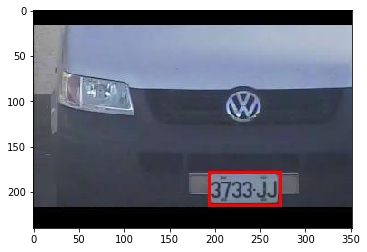

In [72]:
fig = plt.figure()
ax = plt.gca()
# 显示图像
plt.imshow(img[:,:,::-1])
# Create a Rectangle patch
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2]-bbox[0],bbox[3]-bbox[1],linewidth=3,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

print(label)

## IOU计算

In [74]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    # box [xmin,ymin,xmax,ymax] 
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [75]:
bb_intersection_over_union([39, 63, 203, 112], [54, 66, 198, 114])

0.7980093676814989